# English Text Generation using LSTM (Shakespeare and War & Peace)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

### Downloading the datasets from the given link

In [ ]:
#load the text file
file_path = keras.utils.get_file('shakespeare.txt', 'https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt')

with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

4573338/4573338 [==============================] - 1s 0us/step


In [ ]:
#load the text file 2
file_path2 = keras.utils.get_file('warpeace.txt', 'https://cs.stanford.edu/people/karpathy/char-rnn/warpeace_input.txt')

with open(file_path2, 'r', encoding='utf-8') as f:
    text2 = f.read()

### Data Exploration

In [ ]:
#total number of characters in the text file
len(text)

4573338

In [ ]:
#total number of characters in the text file 2
len(text2)

3196213

In [ ]:
#unique characters in the text
chars = sorted(set(text))
print(chars)
print(len(chars))

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
67


In [ ]:
#unique characters in the text 2
chars2 = sorted(set(text2))
print(chars2)
print(len(chars2))

['\n', ' ', '!', '"', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'ä', 'é', 'ê', '\ufeff']
83


# Vectorization

In [ ]:
#mapping characters to indices
char_to_idx = {char: index for index, char in enumerate(chars)}
print(char_to_idx)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, '[': 39, ']': 40, 'a': 41, 'b': 42, 'c': 43, 'd': 44, 'e': 45, 'f': 46, 'g': 47, 'h': 48, 'i': 49, 'j': 50, 'k': 51, 'l': 52, 'm': 53, 'n': 54, 'o': 55, 'p': 56, 'q': 57, 'r': 58, 's': 59, 't': 60, 'u': 61, 'v': 62, 'w': 63, 'x': 64, 'y': 65, 'z': 66}


In [ ]:
#mapping characters to indices 2
char_to_idx2 = {char2: index2 for index2, char2 in enumerate(chars2)}
print(char_to_idx2)

{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '/': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, ';': 23, '=': 24, '?': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, 'Z': 51, 'a': 52, 'b': 53, 'c': 54, 'd': 55, 'e': 56, 'f': 57, 'g': 58, 'h': 59, 'i': 60, 'j': 61, 'k': 62, 'l': 63, 'm': 64, 'n': 65, 'o': 66, 'p': 67, 'q': 68, 'r': 69, 's': 70, 't': 71, 'u': 72, 'v': 73, 'w': 74, 'x': 75, 'y': 76, 'z': 77, 'à': 78, 'ä': 79, 'é': 80, 'ê': 81, '\ufeff': 82}


In [ ]:
#mapping indices to characters
idx_to_char = np.array(chars)
print(idx_to_char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' '[' ']' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm'
 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [ ]:
#mapping indices to characters
idx_to_char2 = np.array(chars2)
print(idx_to_char2)

['\n' ' ' '!' '"' "'" '(' ')' '*' ',' '-' '.' '/' '0' '1' '2' '3' '4' '5'
 '6' '7' '8' '9' ':' ';' '=' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J'
 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'a' 'b'
 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't'
 'u' 'v' 'w' 'x' 'y' 'z' 'à' 'ä' 'é' 'ê' '\ufeff']


In [ ]:
#vectorizing the text
vec_text = np.array([char_to_idx[char] for char in text])
vec_text

array([18, 49, 58, ..., 45,  8,  0])

In [ ]:
#vectorizing the text 2
vec_text2 = np.array([char_to_idx2[char2] for char2 in text2])
vec_text2

array([82,  3, 48, ..., 72, 70, 10])

# Dividing text into 100 character sentences and 8 character words respectively

In [ ]:
sentence_len = 100
examples_per_epoch = len(text) // (sentence_len + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 45280


In [ ]:
sentence_len2 = 8
examples_per_epoch2 = len(text2) // (sentence_len2 + 1)

print('examples_per_epoch 2:', examples_per_epoch2)

examples_per_epoch 2: 355134


In [ ]:
#final training dataset
char_data = tf.data.Dataset.from_tensor_slices(vec_text)

for char in char_data.take(5):
    print(idx_to_char[char.numpy()])

F
i
r
s
t


In [ ]:
#final training dataset 2
char_data2 = tf.data.Dataset.from_tensor_slices(vec_text2)

for char2 in char_data2.take(5):
    print(idx_to_char2[char2.numpy()])


"
W
e
l


In [ ]:
#creating batches
sentences = char_data.batch(sentence_len + 1, drop_remainder=True)

In [ ]:
#creating batches 2
sentences2 = char_data2.batch(sentence_len2 + 1, drop_remainder=True)

In [ ]:
len(list(sentences.as_numpy_iterator()))

45280

In [ ]:
len(list(sentences2.as_numpy_iterator()))

355134

# Shifting right to generate target data

In [ ]:
def input_target_split(text):
    input = text[:-1]
    target = text[1:]
    return input, target

data = sentences.map(input_target_split)

In [ ]:
def input_target_split2(text2):
    input2 = text2[:-1]
    target2 = text2[1:]
    return input2, target2

data2 = sentences2.map(input_target_split2)

In [ ]:
for input_example, target_example in data.take(1):
    print('Input:', repr(''.join(idx_to_char[input_example.numpy()])))
    print('Target:', repr(''.join(idx_to_char[target_example.numpy()])))

Input: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [ ]:
for input_example2, target_example2 in data2.take(1):
    print('Input 2:', repr(''.join(idx_to_char2[input_example2.numpy()])))
    print('Target 2:', repr(''.join(idx_to_char2[target_example2.numpy()])))

Input 2: '\ufeff"Well, '
Target 2: '"Well, P'


In [ ]:
len(data)

45280

In [ ]:
len(data2)

31645

### Splitting the training data into batches

In [ ]:
batch_size = 64

buffer_size = 10000

data = data.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [ ]:
batch_size2 = 64

buffer_size2 = 10000

data2 = data2.shuffle(buffer_size2).batch(batch_size2, drop_remainder=True)

In [ ]:
print('Size of dataset after dividing into batches:', (len(list(data.as_numpy_iterator()))))

Size of dataset after dividing into batches: 707


In [ ]:
print('Size of dataset 2 after dividing into batches:', (len(list(data2.as_numpy_iterator()))))

Size of dataset 2 after dividing into batches: 5548


## LSTM Model Building

In [ ]:
#length of the vocabulary
chars_size = len(chars)
#embedding dimension
embed_dim = 256
#no. of RNN units
rnn_units = 1024

In [ ]:
#length of the vocabulary
chars_size2 = len(chars2)
#embedding dimension
embed_dim = 256
#no. of RNN units
rnn_units = 1024

In [ ]:
def build_model(chars_size, embed_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=chars_size, output_dim=embed_dim, batch_input_shape=[batch_size, None]))
    model.add(tf.keras.layers.LSTM(units=rnn_units, return_sequences=True, stateful=True, recurrent_initializer=tf.keras.initializers.GlorotNormal()))
    model.add(tf.keras.layers.Dense(chars_size))
    return model

In [ ]:
model = build_model(chars_size, embed_dim, rnn_units, batch_size)

In [ ]:
model2 = build_model(chars_size2, embed_dim, rnn_units, batch_size2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           17152     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 67)            68675     
                                                                 
Total params: 5332803 (20.34 MB)
Trainable params: 5332803 (20.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true=labels, y_pred=logits, from_logits=True)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss=loss)
model2.compile(optimizer=adam_optimizer, loss=loss)

In [ ]:
#directory to save checkpoints
dir = 'checkpoints'
os.makedirs(dir, exist_ok=True)

prefix = os.path.join(dir, 'shakespeareLSTM{epoch}')

callback = tf.keras.callbacks.ModelCheckpoint(filepath=prefix, save_weights_only=True)

In [ ]:
#directory to save checkpoints
dir2 = 'checkpoints2'
os.makedirs(dir2, exist_ok=True)

prefix2 = os.path.join(dir2, 'warpeaceLSTM{epoch}')

callback2 = tf.keras.callbacks.ModelCheckpoint(filepath=prefix2, save_weights_only=True)

In [ ]:
history = model.fit(x = data, epochs = 10, callbacks=[callback])

Epoch 1/10
707/707 [==============================] - 61s 76ms/step - loss: 1.9325
Epoch 2/10
707/707 [==============================] - 59s 80ms/step - loss: 1.4308
Epoch 3/10
707/707 [==============================] - 58s 80ms/step - loss: 1.3370
Epoch 4/10
707/707 [==============================] - 57s 79ms/step - loss: 1.2905
Epoch 5/10
707/707 [==============================] - 58s 80ms/step - loss: 1.2579
Epoch 6/10
707/707 [==============================] - 59s 81ms/step - loss: 1.2320
Epoch 7/10
707/707 [==============================] - 59s 80ms/step - loss: 1.2092
Epoch 8/10
707/707 [==============================] - 58s 79ms/step - loss: 1.1891
Epoch 9/10
707/707 [==============================] - 58s 80ms/step - loss: 1.1701
Epoch 10/10
707/707 [==============================] - 58s 80ms/step - loss: 1.1522


In [ ]:
history2 = model2.fit(x = data2, epochs = 10, callbacks=[callback2])

Epoch 1/10
5548/5548 [==============================] - 60s 11ms/step - loss: 1.8974
Epoch 2/10
5548/5548 [==============================] - 58s 10ms/step - loss: 1.7294
Epoch 3/10
5548/5548 [==============================] - 58s 10ms/step - loss: 1.7020
Epoch 4/10
5548/5548 [==============================] - 57s 10ms/step - loss: 1.6878
Epoch 5/10
5548/5548 [==============================] - 58s 10ms/step - loss: 1.6800
Epoch 6/10
5548/5548 [==============================] - 58s 10ms/step - loss: 1.6747
Epoch 7/10
5548/5548 [==============================] - 57s 10ms/step - loss: 1.6707
Epoch 8/10
5548/5548 [==============================] - 58s 10ms/step - loss: 1.6676
Epoch 9/10
5548/5548 [==============================] - 57s 10ms/step - loss: 1.6664
Epoch 10/10
5548/5548 [==============================] - 57s 10ms/step - loss: 1.6635


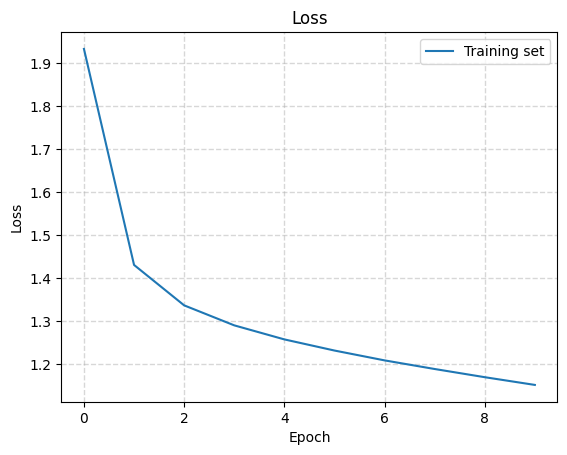

In [ ]:
loss = history.history['loss']
plt.title('Shakespeare Text Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.show()

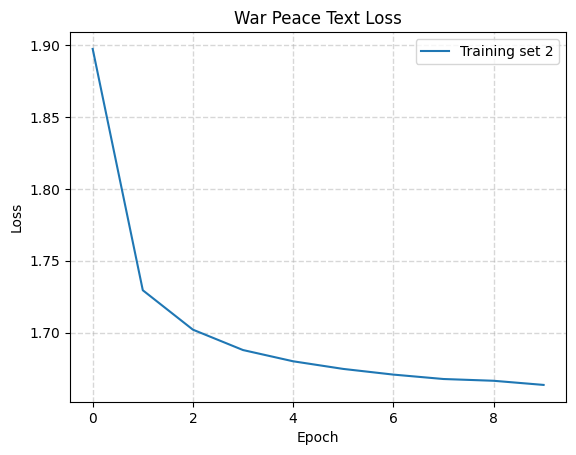

In [ ]:
loss = history2.history['loss']
plt.title('War Peace Text Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set 2')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.show()

# Making Predictions!

In [ ]:
tf.train.latest_checkpoint(dir)
tf.train.latest_checkpoint(dir2)

In [ ]:
sim_batch_size = 1

model = build_model(chars_size, embed_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(dir))

model.build(tf.TensorShape([sim_batch_size, None]))

In [ ]:
model2 = build_model(chars_size2, embed_dim, rnn_units, batch_size=1)

model2.load_weights(tf.train.latest_checkpoint(dir2))

model2.build(tf.TensorShape([sim_batch_size, None]))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 256)            17152     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_1 (Dense)             (1, None, 67)             68675     
                                                                 
Total params: 5332803 (20.34 MB)
Trainable params: 5332803 (20.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def generate_text(model, prompt, length = 1000, temp=1.0):

    input_indices = [char_to_idx[s] for s in prompt]
    input_indices = tf.expand_dims(input_indices, 0)

    text_generated = []

    model.reset_states()
    for char_index in range(length):
        predictions = model(input_indices)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temp
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx_to_char[predicted_id])

    return (prompt + ''.join(text_generated))

In [ ]:
def generate_text2(model2, prompt2, length2 = 1000, temp2 = 1.0):

    input_indices2 = [char_to_idx2[s] for s in prompt2]
    input_indices2 = tf.expand_dims(input_indices2, 0)

    text_generated2 = []

    model.reset_states()
    for char_index2 in range(length2):
        predictions2 = model(input_indices2)
        predictions2 = tf.squeeze(predictions2, 0)

        predictions2 = predictions2 / temp2
        predicted_id2 = tf.random.categorical(
        predictions2,
        num_samples=1
        )[-1,0].numpy()

        input_indices = tf.expand_dims([predicted_id2], 0)

        text_generated2.append(idx_to_char[predicted_id2])

    return (prompt2 + ''.join(text_generated2))

In [ ]:
#temperature = 1.0
print(generate_text(model, prompt=u"RITHEESH: ", length = 1000, temp=1.0))
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print(generate_text2(model2, prompt2=u"hello", length2 = 1000, temp2=1.0))

RITHEESH: but may I grace one
poer to interrew him?

FLAVIUS:

First Gaoler:
In this a night she shall be lever'd have lellied as cheerfully attaint.
I call the unmalling one, my father's tom,
And put them in sad blood. Dispute me vipe, before us, I will leave:
The one alive.

ALL:
Captain Blastom, see them persuaded.

BASTARD:
Is your provoket can do as seven as I have
saws to offer the lamentable servants.
And now will I not yield unfold the English?
And all this fort, ld stands still, Lean, sir, and all
our house in me, safe and am a graveould see you;
But baggages: and when I am a king,
He will, my lord, for a king, my guil! this villain,
Nor search with the thing you healthinking:
You must not make an ace; for either fell well,
Whether fortune treaten'd with a dull whip their tricks we do remain a nothing so much
sized as to be saved: herein God's word
must I beheart: he sees thee: what right hath make you laid of the near? I am his silk.
Happy gatish your bosom for a knowlerga's 

In [ ]:
#temperature = 1.5
print(generate_text(model, prompt=u"RITHEESH GURURI: ", length = 1000, temp=1.5))
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print(generate_text2(model2, prompt2=u"world", length2 = 1000, temp2=1.5))

RITHEESH GURURI: HAMLET:
Not I.

HELee.

NYM:
Sienann; it is; if not, you will, push: that's
clean refrance tamn:
Then, to Eng, force, pardon; thily nothing,
Would out.

First Soldwell
Caesar:
Caesar bore, I slew God look
SIL:
DaCy, you elr,-poor ape, Time, cons, it walks from
Poupe and Hurthouslaft? ipear,luts so: what ith him? I do been s
No madath than Summon! Consilence moonshtood's rights.

ULYSSES:
I oator:
Marry, an't be so, LeMonger; and he thritoin Plue
wives parcolable! O monsieur.

SALPER:
Sarrie; be givenells mischieve:
Mine eads firsy reports wr in thy sooner. Lo,'t to Northamen

dissld flowers? thou have a
pain, the blaz; no.
But, my br tOBARY: CKNOTrundle 'em crack, aid
Five hurts forbeal.
I may live past villain acy
the civil Londur! whereuply!
Didings, then!

BUCKINGHAM:
Madman, my Lord of York, Vatid u!
You're nours, forbeawing chiefest. Alas!: 'I do!
Le assure them, I'll.
Piron,
Extolusis?

MESSAL to Agamemocu of mine?

POINS:
My kingdown oats, three-speery, doubt no